In [5]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot


import data
import core

HEIGHT_UNLIMIT = 1e10

In [2]:
for test in range(1, 22):
    test_str = str(test).zfill(2)
    print('start for test #' + str(test))

    accuracy_winner = -1
    h_winner = -1

    X_train, Y_train = data.read_data(test_str + '_train.csv')
    X_test, Y_test = data.read_data(test_str + '_test.csv')

    tree_builder = core.TreeBuilder(X_train, Y_train, HEIGHT_UNLIMIT)
    tree = tree_builder.build_tree()
    print('  build tree with height ' + str(tree.height))

    for _ in range(1, tree.height):
        h = tree.height - 1
        tree = tree_builder.reduce_height(tree, h)
        predictions = list(map(lambda x : tree.classify(x), X_test))
        accuracy = accuracy_score(Y_test, predictions)

        if accuracy_winner < accuracy:
            accuracy_winner = accuracy
            h_winner = h

    print('  winner h = ' + str(h_winner) + ' with accuracy ' + str(accuracy_winner))

    forest = core.RandomForest(X_train, Y_train)

    predictions = list(map(lambda x : forest.classify(x), X_test))
    accuracy = accuracy_score(Y_test, predictions)

    print('  build random forest with accuracy ' + str(accuracy))
    print('  accuracy profite ' + str(accuracy_winner - accuracy))

start for test #1
  build tree with height 14
  winner h = 3 with accuracy 0.9997429966589566
  build random forest with accuracy 0.9866358262657414
  accuracy profite 0.013107170393215184
start for test #2
  build tree with height 15
  winner h = 9 with accuracy 0.7061068702290076
  build random forest with accuracy 0.19770992366412213
  accuracy profite 0.5083969465648855
start for test #3
  build tree with height 11
  winner h = 3 with accuracy 1.0
  build random forest with accuracy 0.8659594985535197
  accuracy profite 0.13404050144648028
start for test #4
  build tree with height 11
  winner h = 5 with accuracy 0.992
  build random forest with accuracy 0.6441739130434783
  accuracy profite 0.34782608695652173
start for test #5
  build tree with height 9
  winner h = 3 with accuracy 0.9956709956709957
  build random forest with accuracy 0.9264069264069265
  accuracy profite 0.06926406926406925
start for test #6
  build tree with height 13
  winner h = 3 with accuracy 0.99889624724

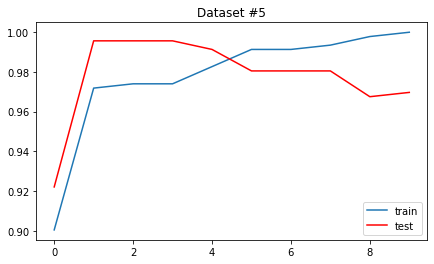

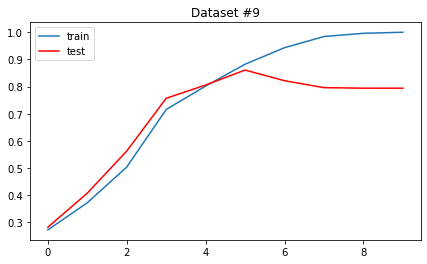

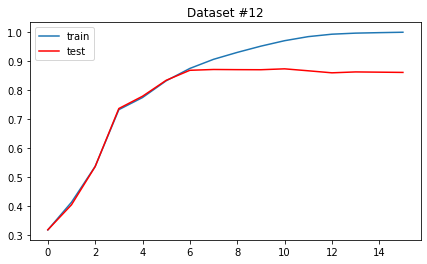

In [8]:
min_height = 5
middle_height = 9
max_height = 12

for i in [min_height, middle_height, max_height]:
    i_str = str(i).zfill(2)

    X_train, Y_train = data.read_data(i_str + '_train.csv')
    X_test, Y_test = data.read_data(i_str + '_test.csv')

    tree_builder = core.TreeBuilder(X_train, Y_train, HEIGHT_UNLIMIT)
    tree = tree_builder.build_tree()
    predictions = list(map(lambda x : tree.classify(x), X_test))
    accuracy = accuracy_score(Y_test, predictions)

    X = [tree.height]
    test = [accuracy]

    predictions = list(map(lambda x : tree.classify(x), X_train))
    accuracy = accuracy_score(Y_train, predictions)

    train = [accuracy]

    for _ in range(1, tree.height + 1):
        h = tree.height - 1
        X.append(h)

        tree = tree_builder.reduce_height(tree, h)
        predictions = list(map(lambda x : tree.classify(x), X_test))
        accuracy = accuracy_score(Y_test, predictions)

        test.append(accuracy)

        predictions = list(map(lambda x : tree.classify(x), X_train))
        accuracy = accuracy_score(Y_train, predictions)

        train.append(accuracy)

    f, ax = plot.subplots(1, 1, sharey=True)
    f.set_figheight(4)
    f.set_figwidth(7)
    ax.set_title('Dataset #{}'.format(i))
    line, = ax.plot(X, train)
    line.set_label('train')
    line, = ax.plot(X, test, color='red')
    line.set_label('test')
    ax.legend()
    plot.show()